In [22]:
base_path="../eit_dual_experiments/exp_0.1" #Don't add '/' at start and end
T=200 #Training time period
C=1000000 #Capital available
file=1 #Index_file
m=8 #Inital Size of Kernel
lbuck=2 #Size Of Buckets
pho=0.1 #Transaction Cost Proportion
lamda=1/(1000*C) # lower_bound for capital invested in jth stock
nuh=0.8  # upper_bound
xii=1.2 # Limit for Tracking Error
k=14 #Cardinality constraint for stocks in portfolio
p=3 #If stock not selected in optimal soln in last p iters then it is to be dropped from kernel
f=12
w_return=1000
w_risk=1
#cj,cb are declared in script

### Test Linear Relaxation script

In [18]:
import sys
sys.path.insert(0,"..")

In [19]:
!rm -r $base_path

In [23]:
%%time
!python ../src_dual/linear_relaxation.py $file $T $xii $k $pho $nuh $C $lamda $f $w_return $w_risk $base_path

Running Linear Relaxation of EIT ...
/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 293 (-51) rows, 504 (-51) columns and 6946 (-153) elements
Clp0000I Optimal - objective value 815747.42
Coin0511I After Postsolve, objective 815747.42, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 815747.4171 - 290 iterations time 0.002, Presolve 0.00
***************************************************

Optimisation Status=0
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
CPU times: user 39.7 ms, sys: 20.8 ms, total: 60.4 ms
Wall time: 2.89 s


In [5]:
from IPython.display import Image, display

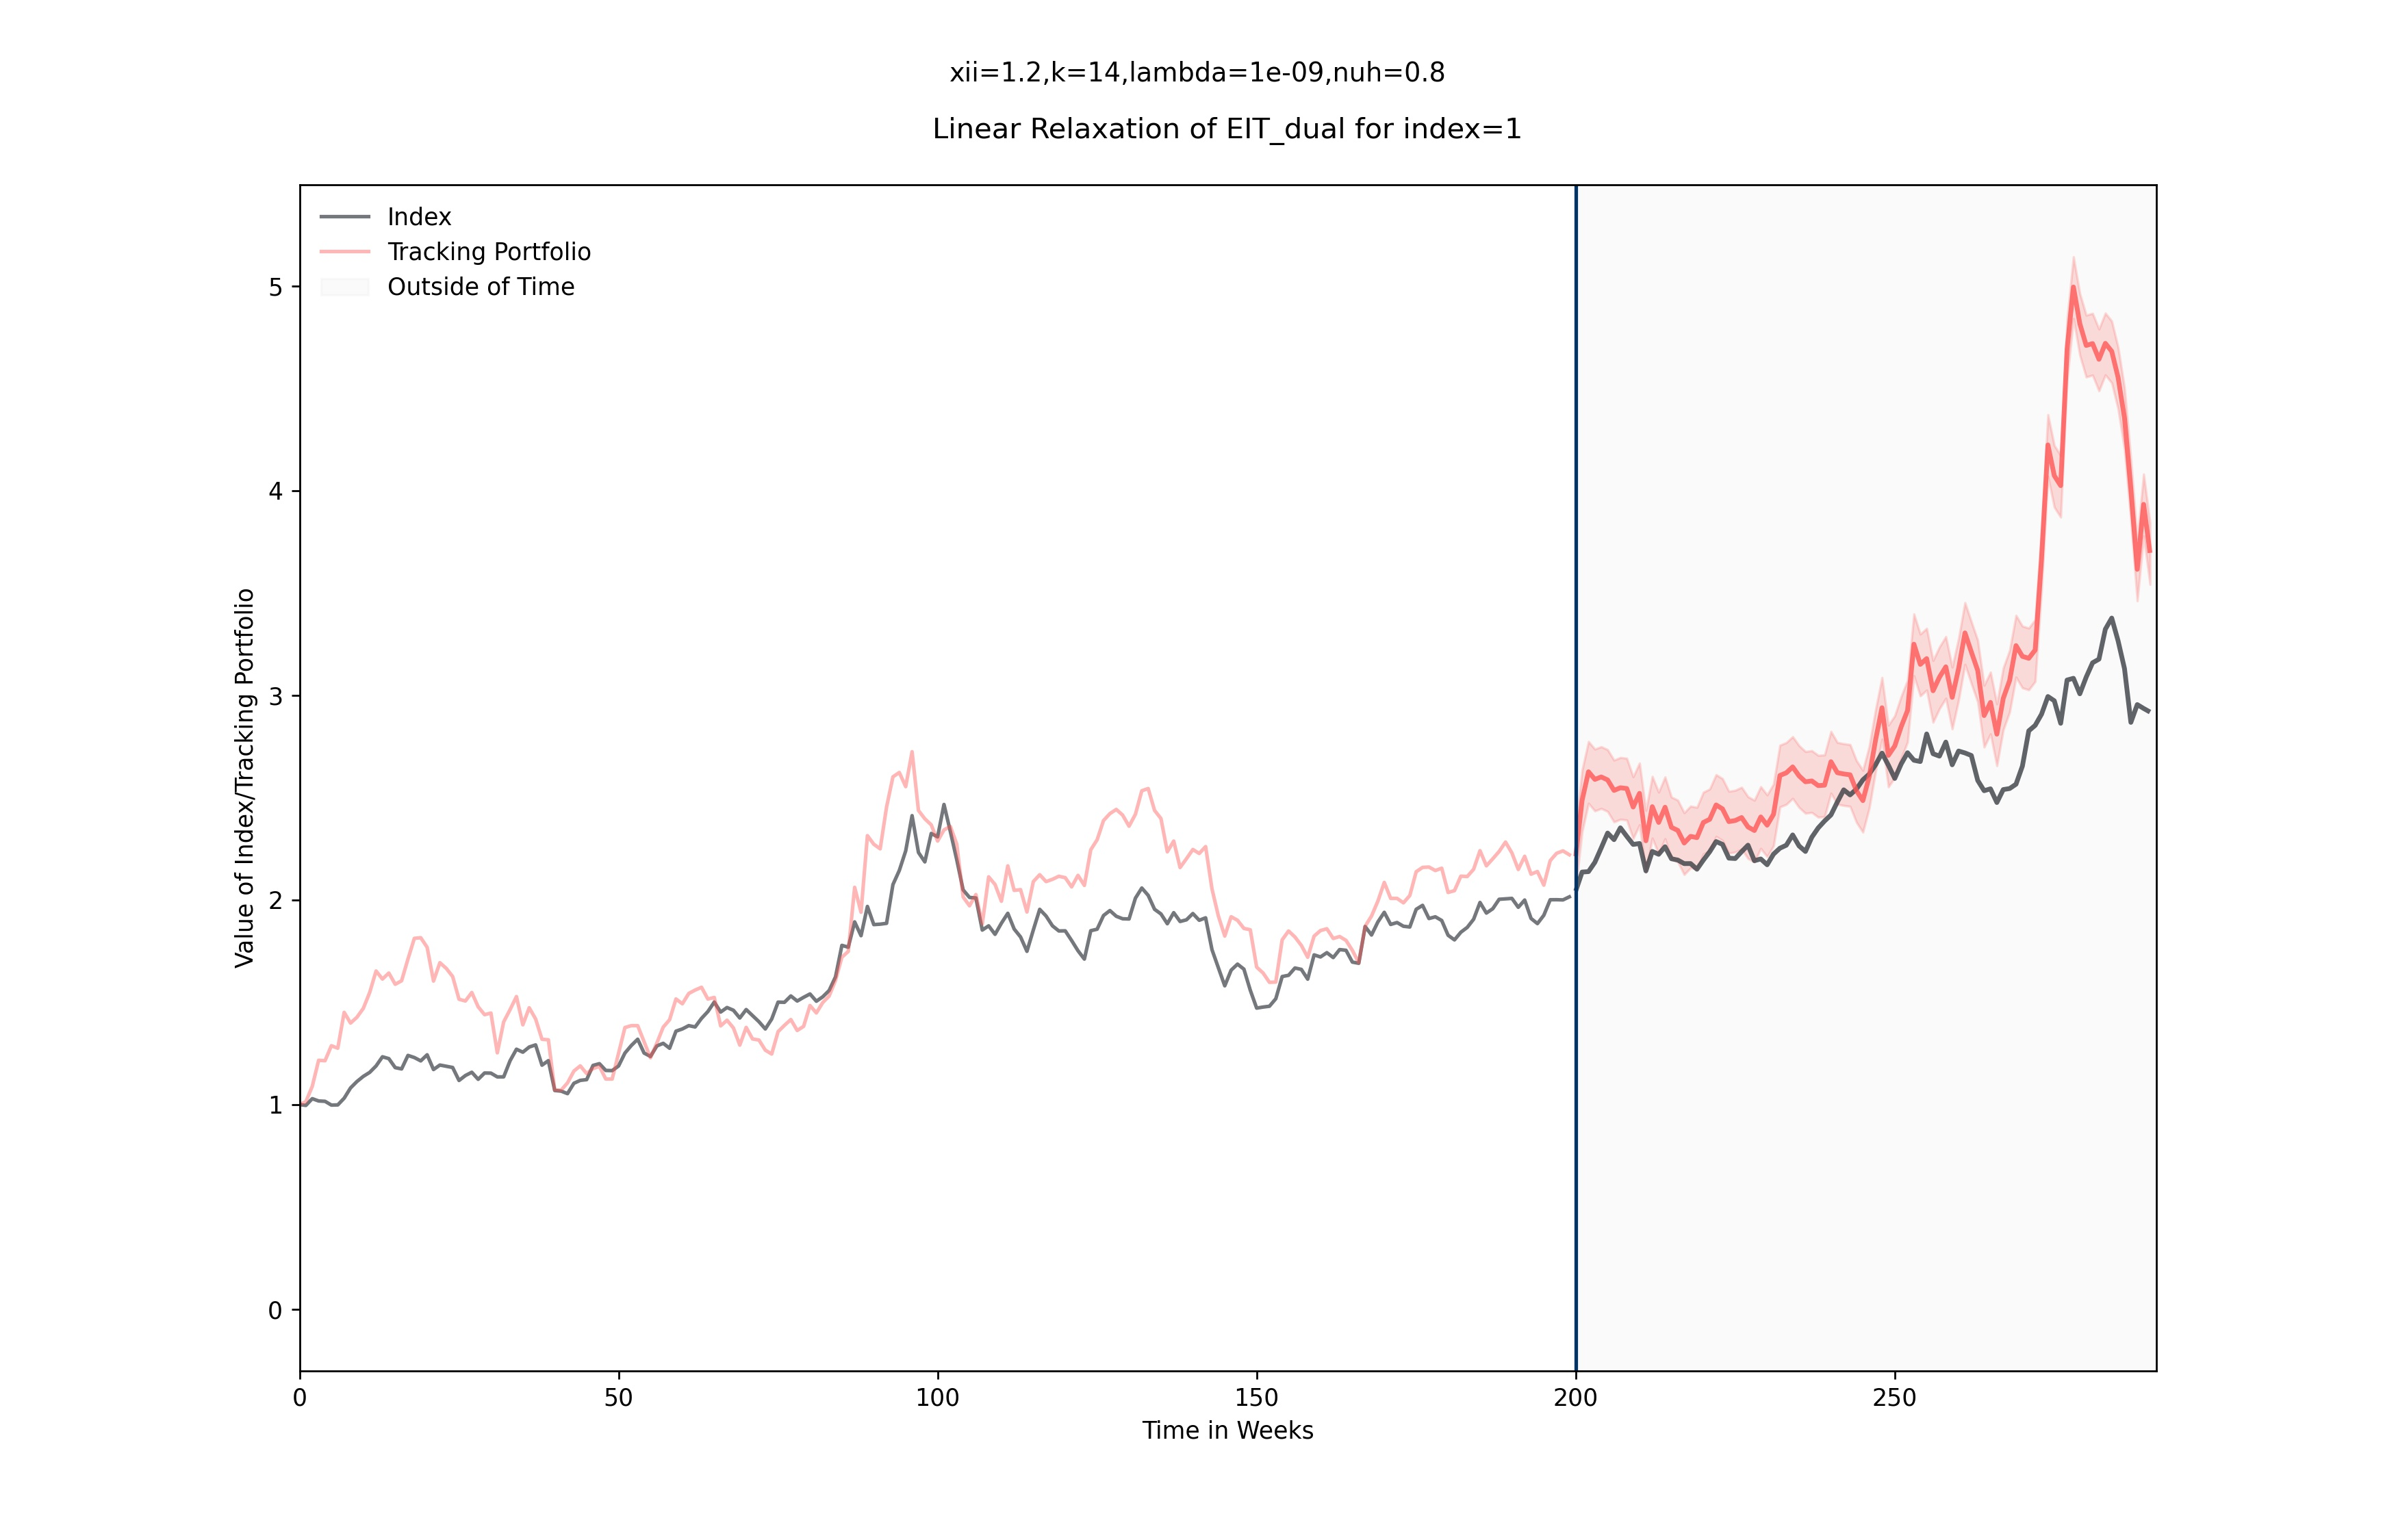

In [24]:
Image(filename=base_path+'/LP_EIT_Dual for index_{}.jpg'.format(file))